#### End to End Machine Learnin Project

Machine Learning Project will generall follow  the below machine learning development cycle

1. Problem defination/ Statement
2. Collection of data
3. Data Cleaning - This will involve
   - Handling Missing Data
   - Handling Outliers
   - Remove Duplicates
   - Correct Data formats
4. Exploratory Data Analysis
5. Data machine Learning Pre-processing(Feature engineering) which includes
     - Feature Transformation
     - Feature Creation
     - Feature Encoding
     - Feature selection
     - Feature Scaling
     - Dimensionality Reduction
     - Handling Imbalanced Data
6. Choice of Algorithim to used based on Machine Learning problems
7. Train your data on Train set
8. Fine tune your model
9. Evaluate your model
10. Deploy your model


----
----

In this  Noteboook we will focus on Choice of model , train and testing your models

----
----

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


pd.set_option('display.float_format','{:.2f}'.format)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/AML/Data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY


**Our Problem Statement**

- To create a model that can predict the median_house_value, This is regression problem

**Data Cleaning**

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df['total_bedrooms']= df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

**Data Feature engineering**


**1.Feature Creation**

In [ ]:
df['rooms_per_households']     = df['total_rooms'] / df['total_bedrooms']
df['population_per_household'] = df['population'] / df['households']

**2.Feature Encoding**

1. Encoding (Data Encoding:)

- In Data Encoding we have 2 approaches
    1. **One Hot Encoding** : 0ne-hot encoding converts categorical variables into a series of binary variables (0 or 1). Each category is represented as a binary vector where only one element is "hot" (1), and the rest are "cold" (0). t’s commonly used when the categorical variable does not have an intrinsic order and is typically used with nominal data.

    2. **Label encoding** assigns each category a unique integer value. Each category is mapped to an integer.It’s often used when the categorical variable has an order or rank (ordinal data). However, it can be misleading when applied to nominal data because the model may incorrectly infer an order or relationship between categories.

  


In [ ]:
# We will use One Hot Encoding function from sklearn model
from sklearn.preprocessing import OneHotEncoder

# Intialize the oneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

#Fit and Transform the data
encoder_data = encoder.fit_transform(df[['ocean_proximity']])
print(encoder_data[0])

#  Convert the encoded data to a DataFrame for easier visualization
encoded_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(['ocean_proximity']))

df = pd.concat([df, encoded_df], axis=1).drop(columns=['ocean_proximity'])
df.head(1)

[0. 0. 0. 1. 0.]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,6.82,2.56,0.00,0.00,0.00,1.00,0.00


**Create a Test & Train**

In [ ]:
from sklearn.model_selection import train_test_split
# First we split data into Target and Input Features

X = df.drop(columns='median_house_value')
y = df['median_house_value']

X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Now Lets use our regressor Models**

For this example we will work with 3

1. Linear Regression
2. Random Forest regessor
3. DecisionTreeRegressor

---
---

And since we are working with regression models our evaluation metrics we will use

1. MSE - Mean Squared Error
2. RMSE - Root Mean Squared Error
3. MAPE - Mean Absolute Percentaga Error
4. R2 Adjusted

In [ ]:
# Lets use our regressors models to create Base Models

from sklearn.linear_model import LinearRegression
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestRegressor
from sklearn.metrics      import mean_absolute_percentage_error , mean_squared_error ,r2_score

from math import sqrt


# create an instance of the model
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor()
          ]


results ={}

for model in models:
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    results['model_name'] = model.__class__.__name__

    # Evaluate
    mse_score  = mean_squared_error(y_test,y_preds)
    rmse_score = sqrt(mse_score)
    mape_score = mean_absolute_percentage_error(y_test,y_preds)
    r_score    = r2_score(y_test,y_preds)

    # Store the results
    results[model.__class__.__name__] = {
        'MSE' : mse_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'R^2' : r_score
        }

results

{'model_name': 'RandomForestRegressor',
 'LinearRegression': {'MSE': 5008649147.188317,
  'RMSE': 70771.81039925654,
  'MAPE': 0.29595521964515786,
  'R^2': 0.6177796985249631},
 'DecisionTreeRegressor': {'MSE': 5244069195.6349325,
  'RMSE': 72415.9457276844,
  'MAPE': 0.24706665254587823,
  'R^2': 0.5998143112027057},
 'RandomForestRegressor': {'MSE': 2572308422.5994034,
  'RMSE': 50717.92999127038,
  'MAPE': 0.183328790989099,
  'R^2': 0.8037018621428796}}

In [ ]:
# Remove the 'model_name' key if present
results.pop('model_name', None)

# Convert the cleaned results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,MSE,RMSE,MAPE,R^2
LinearRegression,5008649147.19,70771.81,0.30,0.62
DecisionTreeRegressor,5244069195.63,72415.95,0.25,0.60
RandomForestRegressor,2572308422.60,50717.93,0.18,0.80


Metrics Explained:


**Mean Squared Error (MSE)**
Definition: Measures the average squared difference between the predicted values and the actual values. Lower values indicate better model performance.
Interpretation: A lower MSE indicates that the model’s predictions are closer to the actual values.

**Root Mean Squared Error (RMSE)**
Definition: The square root of MSE. It represents the average distance between the predicted values and actual values in the same units as the target variable. Like MSE, lower values indicate better performance.
Interpretation: RMSE gives a sense of how far off predictions are from actual values, on average. Lower RMSE is better.

**Mean Absolute Percentage Error (MAPE)**
Definition: Measures the average absolute percentage error between predicted values and actual values. It is expressed as a percentage. Lower values indicate better model performance.
Interpretation: MAPE indicates the accuracy of predictions. Lower percentages mean the model's predictions are closer to the actual values on average.

**R-squared (R²)**
Definition: Represents the proportion of variance in the dependent variable that is predictable from the independent variables. Ranges from 0 to 1, where 1 indicates perfect prediction.
Interpretation: Higher R² values mean that the model explains a larger proportion of the variance in the target variable.

### Lets an example of classification Problem

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/refs/heads/main/stroke%20data.csv')

data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,115,68,25,258,48.80,0.23,26,0
1,3,103,77,1,142,34.50,0.08,50,1
2,3,88,59,18,80,41.40,0.38,30,0
3,6,94,84,1,0,30.70,0.37,21,0


In [ ]:
data.shape

(5000, 9)

In [ ]:
# Split into Input and Target


X = data.drop(columns='Outcome')
y = data['Outcome']

In [ ]:
# Split into Training and Test

from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# Lets use classification models

from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.metrics      import accuracy_score,classification_report, confusion_matrix


# Create an instance of one model
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train,y_train)  # Train the data
y_preds = log_model.predict(X_test) # Predict the x_tets

print(confusion_matrix(y_test,y_preds))  # Evaluate the model

[[572  82]
 [189 157]]


<Axes: >

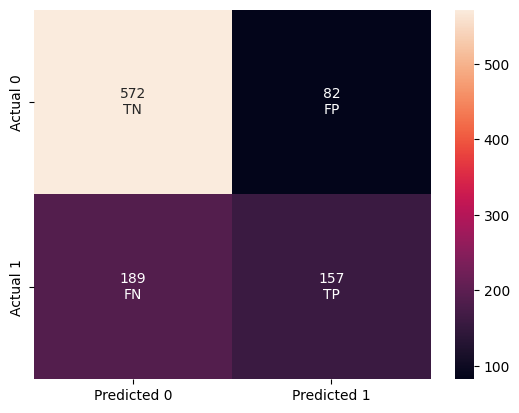

In [ ]:
cm = confusion_matrix(y_test, y_preds)

# Create labels
labels = [[f"{cm[0,0]}\nTN", f"{cm[0,1]}\nFP"],
          [f"{cm[1,0]}\nFN", f"{cm[1,1]}\nTP"]]

sns.heatmap(cm, annot=labels, fmt='',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

#### Lets calculate Precision and Recall

In [ ]:
TN, FP, FN, TP = cm.ravel()

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.66
Recall: 0.45


1. Precision is about being correct when you say "positive". High precision>> means few false alarms

2. Recall is about catching all the actual positives. High recall>> means few missed positives.

Think of it like this:

If you were a doctor diagnosing a rare disease:

- Precision answers  "When I diagnose someone as sick, how often am I right?"
-  Recall answers  "Out of all sick people, how many did I actually diagnose

**What about F1 Score?**

In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"F1 Score:  {f1_score:.2f}")  # F1 score balances precision and recall into one number , its the harmonic mean of Precision and recall

F1 Score:  0.54


In [ ]:
# Lets now use an inbult method
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       761
           1       0.45      0.66      0.54       239

    accuracy                           0.73      1000
   macro avg       0.66      0.70      0.67      1000
weighted avg       0.77      0.73      0.74      1000



In [ ]:
# For Class O

TN, FP, FN, TP = cm.ravel()

# Treat class 0 as the "positive" label
precision_0 = TN / (TN + FN)
recall_0 = TN / (TN + FP)
f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)

print(f"Precision (class 0): {precision_0:.2f}")
print(f"Recall    (class 0): {recall_0:.2f}")
print(f"F1 Score  (class 0): {f1_0:.2f}")


Precision (class 0): 0.75
Recall    (class 0): 0.87
F1 Score  (class 0): 0.81


**ROC and AUC**

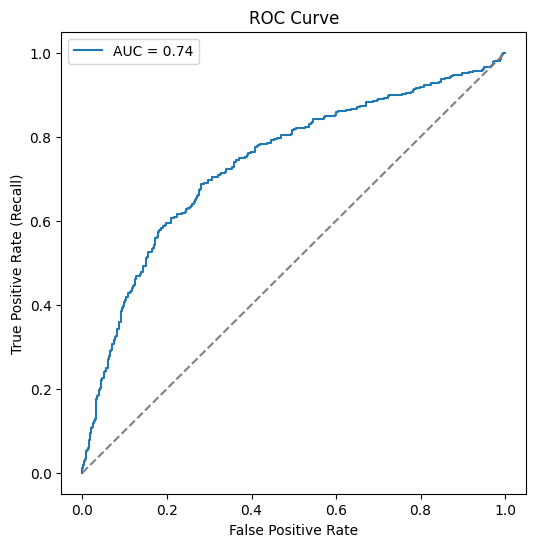

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = log_model.predict_proba(X_test)[:, 1]  # Probability of class 1

#y_test are true labels and y_probs are predicted probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()